In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import csiborgtools
from h5py import File

In [20]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
cat = csiborgtools.read.CSiBORGCatalogue(7444, paths, "halofinder_catalogue", "FOF")

2023-11-23 11:17:00.672141:   opening `/mnt/extraspace/rstiskalek/CSiBORG/processed_output/parts_FOF_07444.hdf5`.


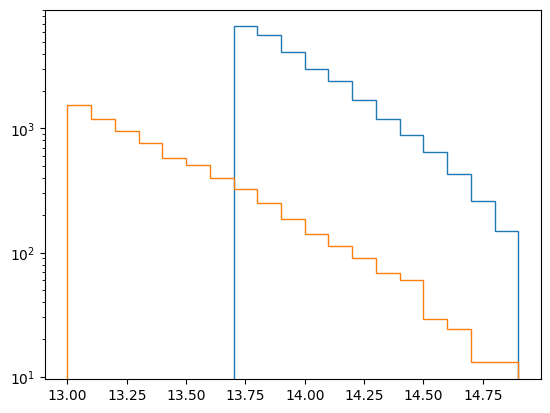

In [28]:
bins = np.arange(13, 15, 0.1)

plt.figure()
plt.hist(np.log10(mass), bins=bins, log=True, histtype="step")
plt.hist(np.log10(cat["totpartmass"]), bins=bins, log=True, histtype="step")



plt.show()

2023-11-23 11:16:53.499291:   opening `/mnt/extraspace/rstiskalek/CSiBORG/processed_output/parts_FOF_07444.hdf5`.


In [22]:
pos_old = cat["snapshot_final/pos"][:]

In [38]:
mass_old = cat["snapshot_final/mass"][:]

In [44]:
with File("/mnt/zfsusers/rstiskalek/gadget4/examples/V04_DM/output/snapshot_004.hdf5", 'r') as f:
    pos_new = f["PartType1/Coordinates"][:] / 677.7
    mass_new = np.ones(len(pos_new)) * 1e10 * 158.061
    # mass_new = f["PartType1/Mass"][:] * 1e10

In [90]:
box = csiborgtools.read.CSiBORGBox(951, 7444, paths)

field_generator = csiborgtools.field.DensityField(box, "PCS")

In [117]:
field_new = field_generator(pos_new, mass_new, 128)
field_old = field_generator(pos_old, mass_old, 128)

Loading particles for the density field:  97%|█████████▋| 30/31 [00:58<00:01,  1.97s/it]


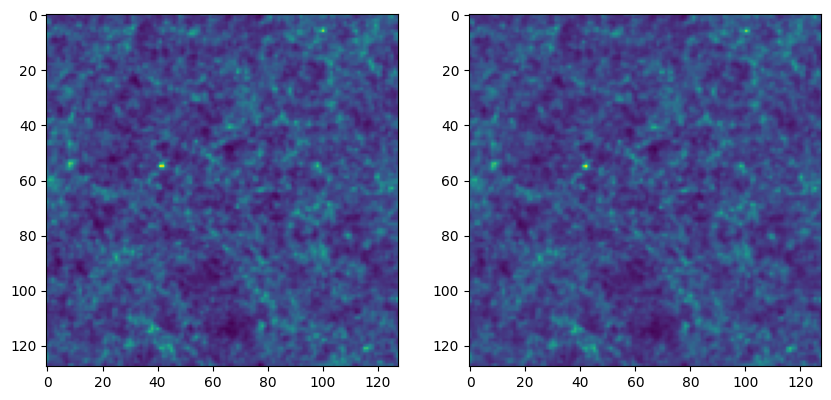

In [127]:
ax = 0
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.mean(field_new, axis=ax))
axs[1].imshow(np.mean(field_old.T, axis=ax))
# axs[1].imshow(np.mean(field_new, axis=ax) - np.mean(field_old.T, axis=ax))

plt.show()

In [119]:
delta_new = field_new / np.mean(field_new) - 1
delta_old = field_old / np.mean(field_old) - 1


knew, pnew = csiborgtools.field.power_spectrum(delta_new, box.boxsize, field_generator.MAS)
kold, pold = csiborgtools.field.power_spectrum(delta_old, box.boxsize, field_generator.MAS)


Computing power spectrum of the field...
Time to complete loop = 0.17
Time taken = 0.19 seconds

Computing power spectrum of the field...
Time to complete loop = 0.16
Time taken = 0.18 seconds


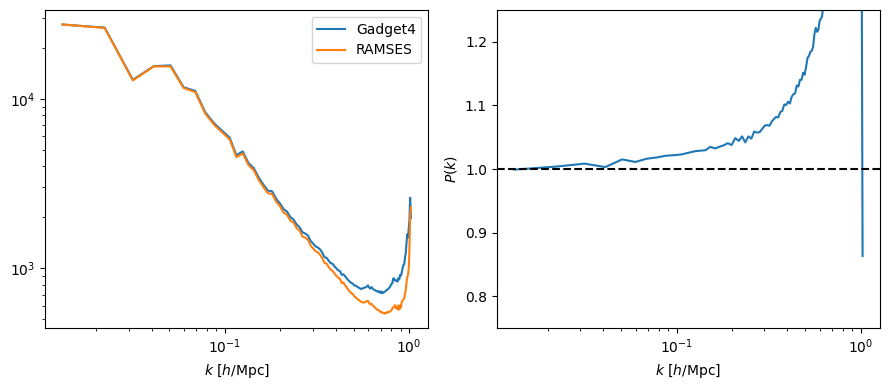

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(knew, pnew, label="Gadget4")
axs[0].plot(kold, pold, label="RAMSES")
axs[0].set_yscale("log")
axs[0].set_xscale("log")

axs[1].plot(knew, pnew / pold)
axs[1].axhline(1, color="k", ls="--")
axs[1].set_xscale("log")
axs[1].set_ylim(0.75, 1.25)

axs

axs[0].set_xlabel(r"$k ~ [h / \mathrm{Mpc}]$")
axs[1].set_xlabel(r"$k ~ [h / \mathrm{Mpc}]$")
axs[1].set_ylabel(r"$P(k)$")
axs[0].legend()

fig.tight_layout()
# plt.savefig("../plots/powerspectrum_test_7444.png", dpi=300, bbox_inches="tight")

fig.show()

In [ ]:
csiborgtools.field.power_spectrum  